# Reboot - SQL Advanced

Tonight, we will use the Blog SQLite database:

In [3]:
import random
def whosnext():
    students = ['TJ', 'Tony', 'Mizuki', 'Emad', 'Norty', 'Lam', 'Lee', 'Stephen', 'Paul', 'Ben']
    print(random.choice(students))

In [ ]:
!tree

## 1. Schema ERD

❓ Open the `data/blog.sqlite` in DBeaver, explore the schema and draw it on [kitt.lewagon.com/db](https://kitt.lewagon.com/db).

_TODO: Double click this cell and **paste** a screenshot of the schema for future reference_.

<div>
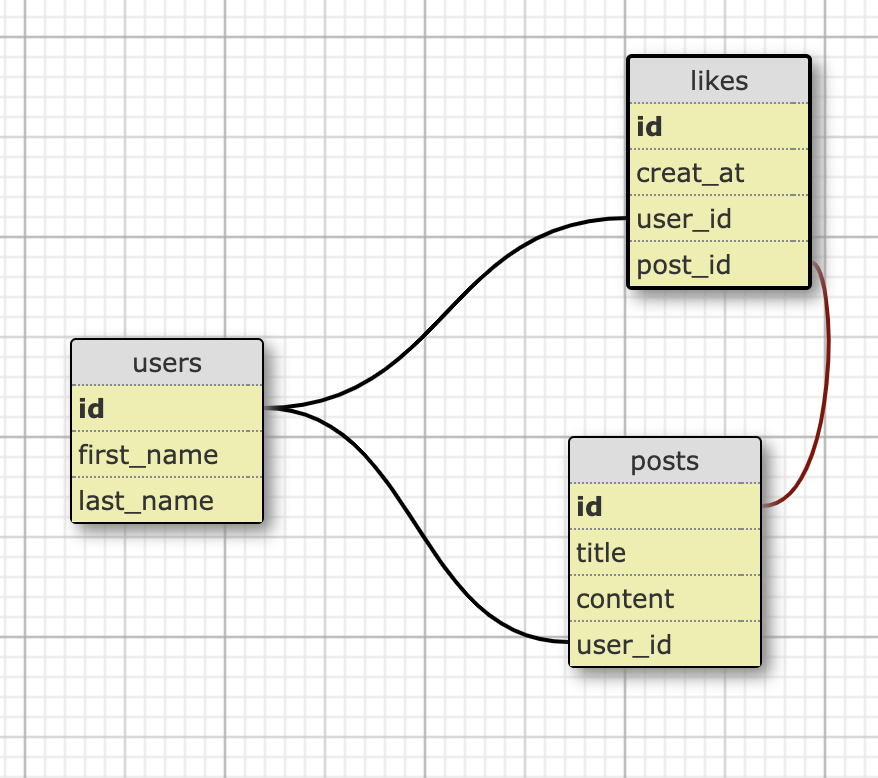
<div/>

---
## 2. Most liked posts

Complete the code to get **the 3 most liked posts**:

In [6]:
import sqlite3

conn = sqlite3.connect("data/blog.sqlite")
c = conn.cursor()

# TODO: write the query
query = """
    SELECT 
        p.title,
        COUNT(l.id) like_count
    FROM posts p 
    JOIN likes l ON p.id = l.post_id 
    GROUP BY p.id 
    ORDER BY like_count DESC
    LIMIT 3
"""

# TODO: Execute the query
c.execute(query)
# TODO: Fetch and print the results
results = c.fetchall()
results

[('Half imagine another.', 84),
 ('Side foot leader popular.', 82),
 ('Area paper whatever mean.', 81)]

---

### Pretty Print using _pandas_

The readbility of our `print()` statements is not so good.

Next week, we will introduce [pandas](https://pandas.pydata.org/) which will vastly improve the UX of our data exploration in Notebooks.

Execute the following cell to load `pandas` library:

In [7]:
import pandas as pd

Then try the previous `query` again, delegating the job of fetching results + displaying them to the `read_sql_query` function of `pandas`:

In [8]:
pd.read_sql_query(query, conn)

,title,like_count
0,Half imagine another.,84
1,Side foot leader popular.,82
2,Area paper whatever mean.,81


---
## 3. Find the three users who 'liked' the most

In [11]:
query = """
    SELECT 
        u.first_name || " " || u.last_name AS name,
        COUNT(l.id) AS likes
    FROM users u
    JOIN likes l ON u.id = l.user_id 
    GROUP BY u.id
    ORDER BY likes DESC
    LIMIT 3
"""

pd.read_sql_query(query, conn)

,name,likes
0,Michael Allen,236
1,Donna Ramirez,233
2,Hayley Williams,227


---
## 4. Find the most liked author

In [14]:
query = """
   SELECT 
        u.first_name || " " || u.last_name AS name,
        COUNT(l.id) like_count
    FROM posts p
    JOIN users u ON p.user_id = u.id 
    JOIN likes l ON l.post_id = p.id
    GROUP BY u.id
    ORDER BY like_count DESC 
    LIMIT 1
"""

pd.read_sql_query(query, conn)

,name,like_count
0,Teresa Moore,647


---
## 5. Who are the authors of the 3 most liked posts?

In [19]:
query = """  
    SELECT 
        p.title,
        COUNT(l.id) like_count,
        u.first_name || " " || u.last_name AS name
    FROM posts p 
    JOIN likes l ON p.id = l.post_id 
    JOIN users u ON u.id = p.user_id 
    GROUP BY p.id 
    ORDER BY like_count DESC
    LIMIT 3
"""

pd.read_sql_query(query, conn)

,title,like_count,name
0,Half imagine another.,84,Melissa Henry
1,Side foot leader popular.,82,Cynthia Raymond
2,Area paper whatever mean.,81,Alexander Cook


---
## 6. How many people liked at least one?

In [23]:
query = """
    -- How many people liked at least once?
    -- WITH like_per_user AS (
    -- 	SELECT 
    -- 		*
    -- 	FROM likes l
    -- 	GROUP BY l.user_id 
    -- )
    -- SELECT COUNT(*)
    -- FROM like_per_user

    SELECT COUNT( DISTINCT l.user_id)
    from likes l 
"""

pd.read_sql_query(query, conn)

,COUNT( DISTINCT l.user_id)
0,49


---
## 7. Compute the cumulative number of likes per day

In [26]:
query = """
    WITH likes_per_day AS (
        SELECT 
            *,
            COUNT(l.id) like_count_per_day
        FROM likes l 
        GROUP BY l.created_at 
    )
    SELECT
        lpd.like_count_per_day,
        SUM(lpd.like_count_per_day) OVER (
            ORDER BY lpd.created_at
        ) AS cumul_likes_per_day,
        lpd.created_at
    FROM likes_per_day lpd
"""

pd.read_sql_query(query, conn)

,like_count_per_day,cumul_likes_per_day,created_at
0,24,24,2019-01-01
1,34,58,2019-01-02
2,40,98,2019-01-03
3,36,134,2019-01-04
4,27,161,2019-01-05
...,...,...,...
331,35,9882,2019-12-24
332,33,9915,2019-12-25
333,32,9947,2019-12-26
334,23,9970,2019-12-27


---
## 8. (Optional) Who's the biggest fan of each author?

The biggest fan of an author is defined as the user who liked the most the author's posts.
<br><br>
<details>
    <summary>💡 Click for Hint</summary>
    You might need to use <code>WITH</code>
</details>


In [ ]:
query = """
    ???
"""

pd.read_sql_query(query, conn)